In [1]:
import os
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '3'
import json
import requests
import tensorflow
# from keras.models import Sequential
# from keras.layers import Activation, Dense, Dropout, LSTM
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
# import seaborn as sns
# import sklearn
# from sklearn.metrics import mean_absolute_error
import streamlit as st

import warnings
# from keras.models import model_from_json
from keras.models import load_model
import altair as alt
import datetime
import time

In [6]:
api = 'https://min-api.cryptocompare.com/data/histohour?fsym=BTC&tsym=USD&limit=2000'
res = requests.get(api)
data = pd.DataFrame(json.loads(res.content)['Data'])
data = data.set_index('time')
data.index = pd.to_datetime(data.index, unit='s')
data=data[data['close']!=0]
data.drop(["conversionType", "conversionSymbol"], axis = 'columns', inplace = True)


In [7]:
data

,high,low,open,volumefrom,volumeto,close
time,,,,,,
2023-02-07 18:00:00,23343.29,22782.67,23279.36,7850.46,1.803842e+08,22924.06
2023-02-07 19:00:00,23124.54,22922.72,22924.06,3352.30,7.731361e+07,23092.66
2023-02-07 20:00:00,23243.01,23037.39,23092.66,2511.01,5.815043e+07,23209.71
2023-02-07 21:00:00,23259.94,23187.86,23209.71,1806.44,4.194616e+07,23199.23
2023-02-07 22:00:00,23301.93,23152.78,23199.23,1339.52,3.110335e+07,23231.12
...,...,...,...,...,...,...
2023-05-01 22:00:00,28143.43,27955.79,27997.04,1170.92,3.283207e+07,28034.52
2023-05-01 23:00:00,28152.74,28023.76,28034.52,1358.84,3.820057e+07,28086.19
2023-05-02 00:00:00,28151.81,27992.73,28086.19,885.37,2.484431e+07,28067.08


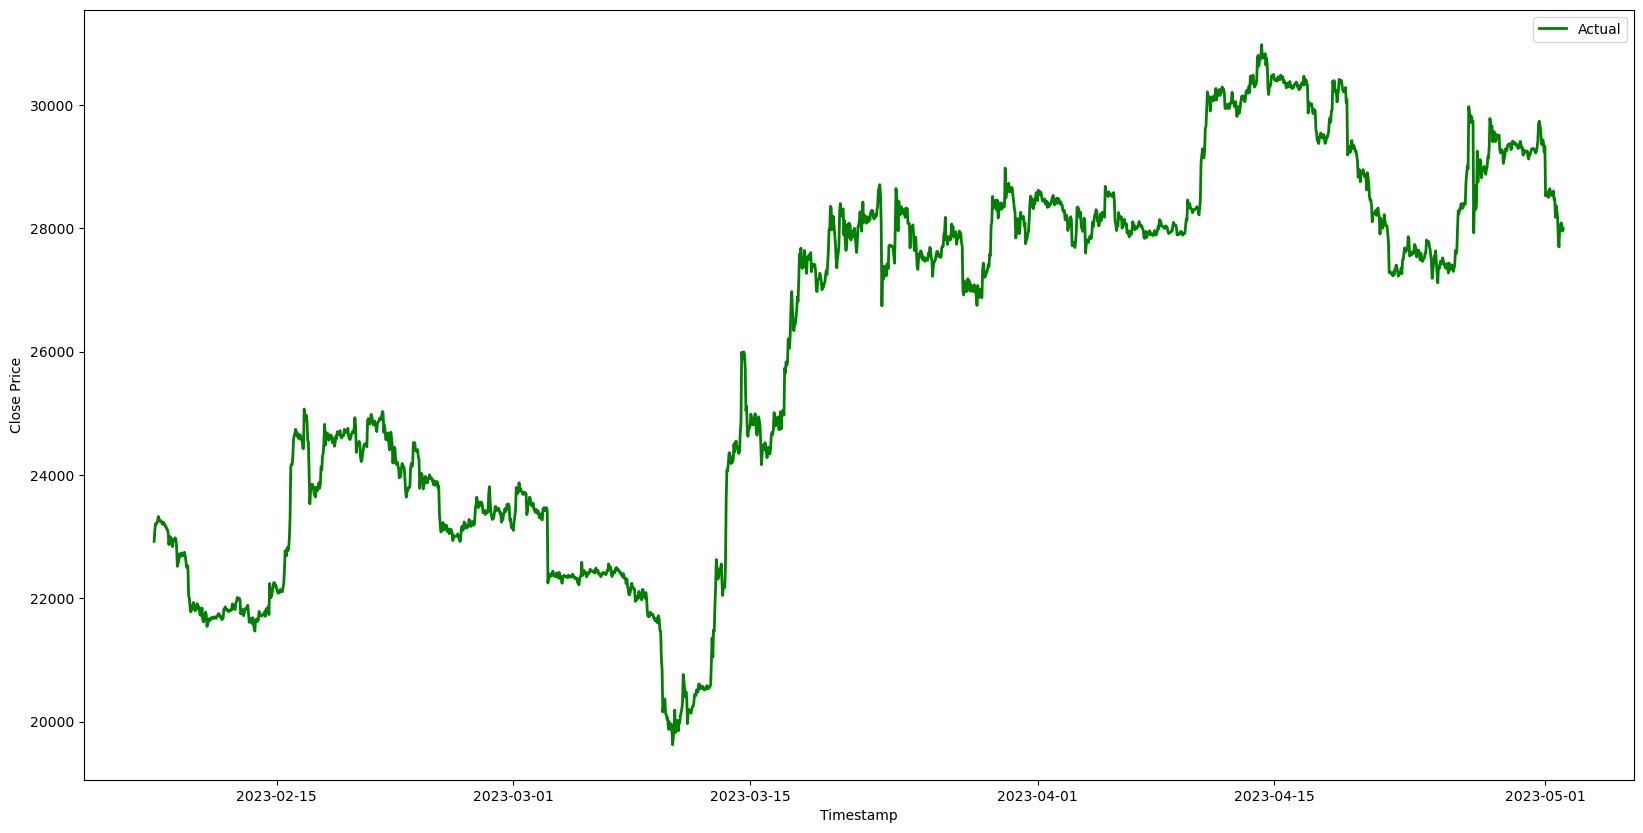

In [10]:
plt.figure(figsize=(20,10))

plt.plot(data['close'],'g',linewidth=2,label = 'Actual')
# plt.plot(fore_data['close'][-6:],'r',linewidth=2,label = 'Predicted')
plt.legend()
plt.xlabel('Timestamp')
plt.ylabel('Close Price')
plt.show()